In [1]:
import pandas as pd
import numpy as np
import sys
import os

In [2]:
m_stat_df = pd.read_csv('../data/out_m_stat/m-stat-en_wiki.csv', index_col=0).dropna()
m_stat_df.rename(columns={'Nums Reverts': 'Num Reverts'}, inplace=True)
m_stat_df['Num Non-Revert Edits'] = m_stat_df['Num Edits'] - m_stat_df['Num Reverts']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
m_stat_df.head()

,Title,M-Statistic,Num Edits,Num Reverts,Num Editors,Num Mutual Editors,Num Non-Revert Edits
Title_ID,,,,,,,
0,Blackboard,0,2,0,1,0,2
1,Coimbatore_tile_company,0,2,0,2,0,2
2,The_moonstone_2,0,2,0,1,0,2
3,African_Hunting_Wasps,0,2,0,1,0,2
4,Morgan_Sheardown,0,2,0,1,0,2


##### Number of Pages

In [4]:
m_stat_df.shape[0]

4644538

##### Number of Pages with Reverts

In [11]:
reverts_mask = m_stat_df['Num Reverts'] > 0
m_stat_df[reverts_mask].shape[0]

1481874

##### Most Number of Edits Overall

In [12]:
m_stat_df['Num Edits'].max()

43650

##### Average Number of Edits (Including Reverts) for Pages with Reverts (fPwR)

In [63]:
m_stat_df[reverts_mask]['Num Edits'].mean()

123.39636568291232

##### Average Number of Reverts fPwR

In [64]:
m_stat_df[reverts_mask]['Num Reverts'].mean()

13.24227768352775

##### Max Number of Reverts fPwR

In [65]:
m_stat_df[reverts_mask]['Num Reverts'].max()

14630

##### Average Number of Mutual Editors fPwR

In [67]:
m_stat_df[reverts_mask]['Num Mutual Editors'].mean()

0.43433044914749835

##### Most Number of Mutual Editors fPwR

In [68]:
m_stat_df[reverts_mask]['Num Mutual Editors'].max()

355

##### Average Number of Editors fPwR

In [69]:
m_stat_df[reverts_mask]['Num Editors'].mean()

60.42453406969823

##### Most Number of Editors fPwR

In [70]:
m_stat_df[reverts_mask]['Num Editors'].max()

13784

##### Number of Controversial Pages

In [71]:
(m_stat_df[reverts_mask]['M-Statistic'] > 1000).sum()

25548

##### Average Number of Mutual Editors from Controversial Pages

In [73]:
m_stat_df[controversial_mask]['Num Mutual Editors'].mean()

10.566306560200408

##### Average Number of Editors from Controversial Pages

In [74]:
m_stat_df[controversial_mask]['Num Editors'].mean()

834.6373884452795

##### Average Number of Edits (Including Reverts) from Controversial Pages

In [75]:
m_stat_df[controversial_mask]['Num Edits'].mean()

1956.2006810709254

##### Average Number of Purely Reverts from Controversial Pages 

In [13]:
m_stat_df[controversial_mask]['Num Reverts'].mean()

356.4336542977924

##### Average and Median M-Statistic Across All Articles

In [9]:
m_stat_df['M-Statistic'].mean(), m_stat_df['M-Statistic'].median()

(195.43117657773496, 0.0)

##### Average and Median M-Statistic for Articles with Reverts

In [15]:
m_stat_df[reverts_mask]['M-Statistic'].mean(), m_stat_df[reverts_mask]['M-Statistic'].median()

(612.5267910767042, 0.0)

##### Average and Median M-Statistic Across Controversial Articles

In [16]:
m_stat_df[controversial_mask]['M-Statistic'].mean(), m_stat_df[controversial_mask]['M-Statistic'].median()

(34847.64549084077, 3650.0)

##### Number of M-Statistic Divisions

In [22]:
zero_m_stat_mask = m_stat_df['M-Statistic'] == 0
pos_m_stat_mask = m_stat_df['M-Statistic'] > 0
m_stat_df[zero_m_stat_mask].shape[0], m_stat_df[pos_m_stat_mask].shape[0], m_stat_df[controversial_mask].shape[0]

(4495961, 148577, 25548)

In [23]:
# Proportion
m_stat_df[controversial_mask].shape[0] / m_stat_df[zero_m_stat_mask].shape[0]

0.005682433633209897

In [88]:
m_stat_df = m_stat_df.sort_values(['M-Statistic', 'Num Edits',
                                   'Num Reverts', 'Num Editors',
                                   'Num Mutual Editors',
                                   'Num Non-Revert Edits', 'Title'])

##### Top 20 M-Statistics

In [89]:
m_stat_df.tail(20).iloc[::-1][['Title', 'M-Statistic']].reset_index(drop=True)

,Title,M-Statistic
0,George_W._Bush,34813075
1,List_of_World_Wrestling_Entertainment_employees,21728308
2,Anarchism,20108760
3,Muhammad,13696900
4,Barack_Obama,10713048
5,Global_warming,9387070
6,Circumcision,8561498
7,United_States,7448470
8,Jesus,7403452
9,Michael_Jackson,6798324


##### Low 20 M-Statistics

In [269]:
low_titles = ["!!Fuck_you!!", "(Who_Wrote)_The_Book_of_Love", "(Where_Were_You)_When_the_World_Stopped_Turning",
          "(What_Did_I_Do_To_Be_So)_Black_and_Blue", "(Come_Round_Here)_I'm_The_One_You_Need",
          "'Twas_in_the_Moon_of_Wintertime", "(International)_Year_of_the_Dolphin",
          "Bikini_Bottom", 'Fat_Dom"_Gamiello', "69th_parallel",
          "1000_Chips_Delicious", "1000_Recordings_To_Hear_Before_You_Die",
          "Dead_Space_(video_game)", "1911_in_Denmark", "69BC", "420BC", "Big_Love_(song)",
          "Big☆Bang!!!", "Married..._with_Children", "Sex,_Pies_&_Idiot_Scrapes", "Sexy_jutsu"]
m_stat_df[['Title', 'M-Statistic']].loc[m_stat_df['Title'].isin(low_titles)]

,Title,M-Statistic
Title_ID,,
1206026,!!Fuck_you!!,0
3518970,'Twas_in_the_Moon_of_Wintertime,0
1268573,(Come_Round_Here)_I'm_The_One_You_Need,0
2387671,(International)_Year_of_the_Dolphin,0
383058,(What_Did_I_Do_To_Be_So)_Black_and_Blue,0
477291,(Where_Were_You)_When_the_World_Stopped_Turning,0
1218434,(Who_Wrote)_The_Book_of_Love,0
2036926,1000_Chips_Delicious,0
96293,1000_Recordings_To_Hear_Before_You_Die,0


### Plot of Barack Obama over Time
We can see certain spikes in the M-Statistic, which likely correlate to specific times of heavy editing.

In [225]:
obama_df = pd.read_csv('../data/out_m_stat/overtime-Barack-Obama.csv')
obama_df['Date'] = pd.to_datetime(obama_df['Timestamp']).dt.date

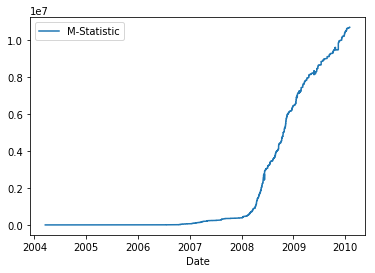

In [227]:
obama_df.plot.line(x='Date', y='M-Statistic')

### Plot of Space:-1999 over Time
We can see certain spikes in the M-Statistic, which likely correlate to specific times of heavy editing.

In [264]:
aek_df = pd.read_csv('../data/out_m_stat/overtime-AEK-Athens-F.C.-season-2009–10.csv')
aek_df['Date'] = pd.to_datetime(aek_df['Timestamp']).dt.date

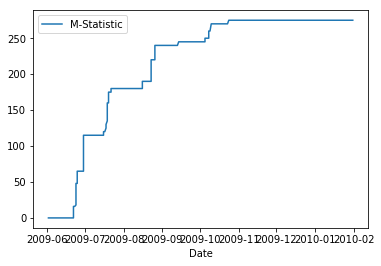

In [265]:
aek_df.plot.line(x='Date', y='M-Statistic')

### Plot of Anarchism over Time
We can see certain spikes in the M-Statistic, which likely correlate to specific times of heavy editing.

In [24]:
ana_df = pd.read_csv('../data/out_m_stat/overtime-Anarchism.csv')
ana_df['Date'] = pd.to_datetime(ana_df['Timestamp']).dt.date

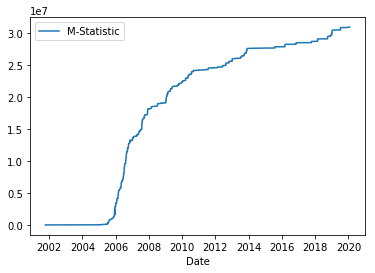

In [28]:
ana_df.plot.line(x='Date', y='M-Statistic')

### Plot of Abortion over Time
We can see certain spikes in the M-Statistic, which likely correlate to specific times of heavy editing.

In [26]:
abo_df = pd.read_csv('../data/out_m_stat/overtime-Abortion.csv')
abo_df['Date'] = pd.to_datetime(abo_df['Timestamp']).dt.date

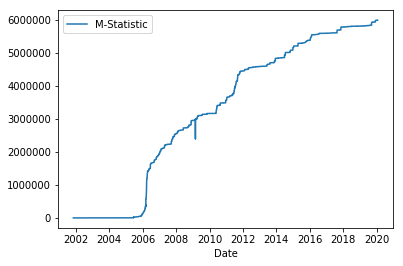

In [27]:
abo_df.plot.line(x='Date', y='M-Statistic')

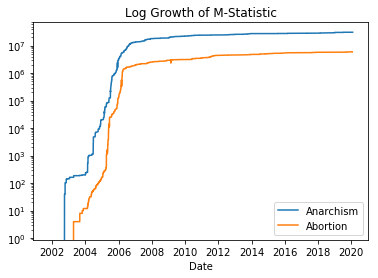

In [37]:
xd_1 = ana_df.rename(columns={'M-Statistic': 'Anarchism'})
xd_2 = abo_df.rename(columns={'M-Statistic': 'Abortion'})

ax = xd_1.plot.line(x='Date', y='Anarchism', logy=True, title='Log Growth of M-Statistic')
xd_2.plot.line(x='Date', y='Abortion', ax=ax, logy=True)